In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2024-04-23'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [5]:
ma_100_days = data.Close.rolling(100).mean()

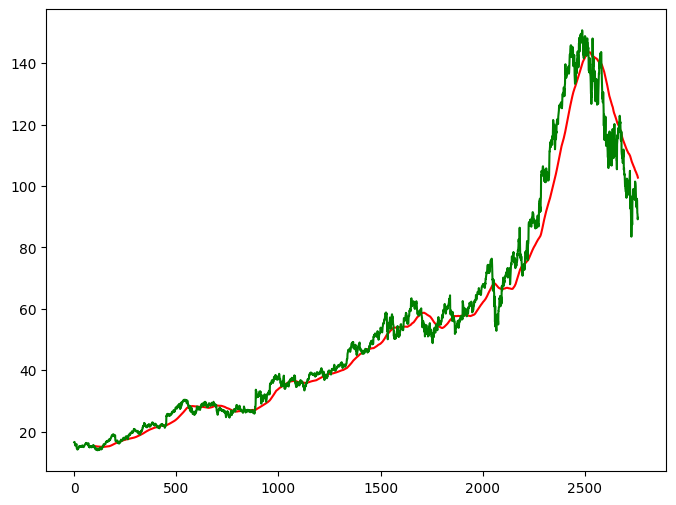

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

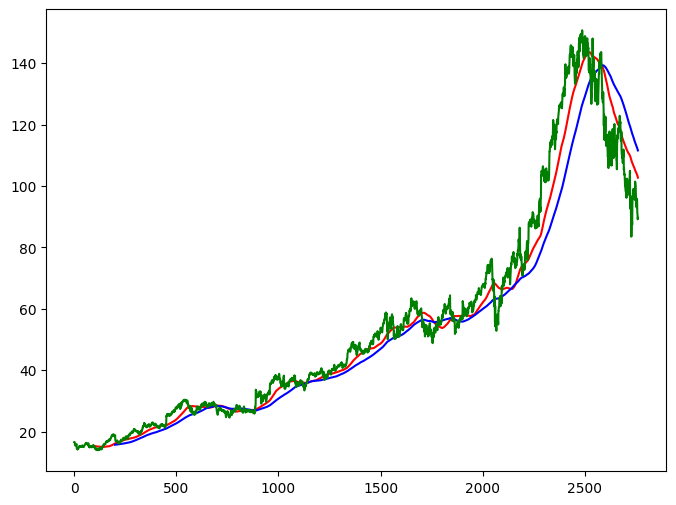

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2208

In [12]:
data_test.shape[0]

553

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\lalit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 354ms/step - loss: 0.0750
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 344ms/step - loss: 0.0076
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 332ms/step - loss: 0.0062
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 299ms/step - loss: 0.0063
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 352ms/step - loss: 0.0045
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 369ms/step - loss: 0.0047
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 326ms/step - loss: 0.0045
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 362ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 383ms/step - loss: 0.0040
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - loss: 0.0041
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 331ms/step - loss: 0.0036
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 340ms/step - loss: 0.0042
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 337ms/step - loss: 0.0033
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 299ms/step - loss: 0.0036
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

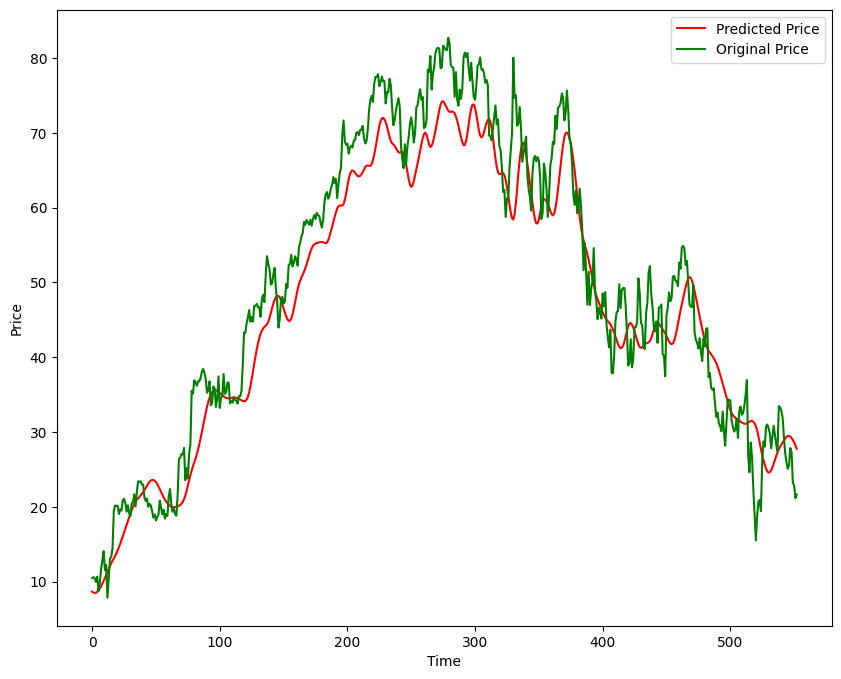

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
from keras.models import load_model
import streamlit as st
import matplotlib.pyplot as plt

# model = load_model('C:\Python\Stock\Stock Predictions Model.keras')
model = load_model("D:\Stock_Market_Prediction_ML\Stock_Predictions_Model.keras")

st.header('Stock Market Predictor')

stock =st.text_input('Enter Stock Symnbol', 'GOOG')
start = '2012-01-01'
end = '2022-12-31'

data = yf.download(stock, start ,end)

st.subheader('Stock Data')
st.write(data)

data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale = scaler.fit_transform(data_test)

st.subheader('Price vs MA50')
ma_50_days = data.Close.rolling(50).mean()
fig1 = plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'r')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig1)

st.subheader('Price vs MA50 vs MA100')
ma_100_days = data.Close.rolling(100).mean()
fig2 = plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'r')
plt.plot(ma_100_days, 'b')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig2)

st.subheader('Price vs MA100 vs MA200')
ma_200_days = data.Close.rolling(200).mean()
fig3 = plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig3)

x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y = np.array(x), np.array(y)

predict = model.predict(x)

scale = 1/scaler.scale_

predict = predict * scale
y = y * scale

st.subheader('Original Price vs Predicted Price')
fig4 = plt.figure(figsize=(8,6))
plt.plot(predict, 'r', label='Original Price')
plt.plot(y, 'g', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()
st.pyplot(fig4)

[*********************100%%**********************]  1 of 1 completed
C:\Users\lalit\AppData\Local\Temp\ipykernel_1198308\2399261731.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\lalit\AppData\Local\Temp\ipykernel_1198308\2399261731.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\lalit\AppData\Local\Temp\ipykernel_1198308\2399261731.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step


C:\Users\lalit\AppData\Local\Temp\ipykernel_1198308\2399261731.py:80: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


DeltaGenerator()

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
from keras.models import load_model
import streamlit as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# model = load_model('C:\Python\Stock\Stock Predictions Model.keras')
model = load_model("D:\Stock_Market_Prediction_ML\Stock_Predictions_Model.keras")

st.header('Stock Market Predictor')

stock = st.text_input('Enter Stock Symbol', 'GOOG')
start = '2012-01-01'
end = '2022-12-31'

data = yf.download(stock, start, end)

st.subheader('Stock Data')
st.write(data)

data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])

scaler = MinMaxScaler(feature_range=(0,1))

pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale = scaler.fit_transform(data_test)

st.subheader('Price vs MA50')
ma_50_days = data.Close.rolling(50).mean()
fig1 = plt.figure(figsize=(8, 6))
plt.plot(ma_50_days, 'r', label='MA 50 Days')
plt.plot(data.Close, 'g', label='Close Price')
plt.legend()
st.pyplot(fig1)

st.subheader('Price vs MA50 vs MA100')
ma_100_days = data.Close.rolling(100).mean()
fig2 = plt.figure(figsize=(8, 6))
plt.plot(ma_50_days, 'r', label='MA 50 Days')
plt.plot(ma_100_days, 'b', label='MA 100 Days')
plt.plot(data.Close, 'g', label='Close Price')
plt.legend()
st.pyplot(fig2)

st.subheader('Price vs MA100 vs MA200')
ma_200_days = data.Close.rolling(200).mean()
fig3 = plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r', label='MA 100 Days')
plt.plot(ma_200_days, 'b', label='MA 200 Days')
plt.plot(data.Close, 'g', label='Close Price')
plt.legend()
st.pyplot(fig3)

x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)

predict = model.predict(x)

scale = 1 / scaler.scale_

predict = predict * scale
y = y * scale

st.subheader('Original Price vs Predicted Price')
fig4 = plt.figure(figsize=(8, 6))
plt.plot(predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
st.pyplot(fig4)


[*********************100%%**********************]  1 of 1 completed


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step


DeltaGenerator()